In [1]:
import pandas as pd

# Load the dataset
tesla_data = pd.read_csv('/kaggle/input/tesla-stock-price/tesla_stock.csv')

# Display the structure of the dataset
print(tesla_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB
None


In [2]:
# Display the first few rows of the dataset
print(tesla_data.head())


         Date       Open       High       Low      Close  Adj Close    Volume
0  2014-01-02   9.986667  10.165333  9.770000  10.006667  10.006667  92826000
1  2014-01-03  10.000000  10.146000  9.906667   9.970667   9.970667  70425000
2  2014-01-06  10.000000  10.026667  9.682667   9.800000   9.800000  80416500
3  2014-01-07   9.841333  10.026667  9.683333   9.957333   9.957333  75511500
4  2014-01-08   9.923333  10.246667  9.917333  10.085333  10.085333  92448000


In [3]:
# Display the statistical summary of the numerical columns
print(tesla_data.describe())


              Open         High          Low        Close    Adj Close  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean     91.718489    93.757384    89.522917    91.687264    91.687264   
std     107.875312   110.313091   105.181104   107.773962   107.773962   
min       9.366667     9.800000     9.111333     9.289333     9.289333   
25%      15.703333    15.982667    15.408000    15.704000    15.704000   
50%      21.533333    21.844000    21.110666    21.577333    21.577333   
75%     193.183334   197.834999   188.344994   193.398331   193.398331   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  2.475000e+03  
mean   1.130757e+08  
std    7.604946e+07  
min    1.062000e+07  
25%    6.600825e+07  
50%    9.243900e+07  
75%    1.322120e+08  
max    9.140820e+08  


In [4]:
# Check for missing values in the dataset
print(tesla_data.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


**What is the overall trend of the Tesla stock's closing price over time?**

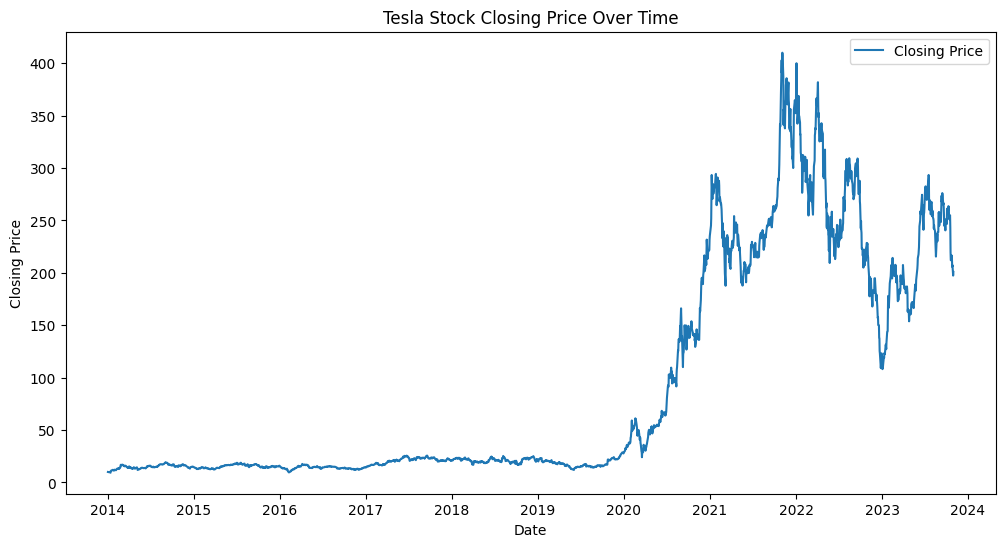

In [5]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Closing Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**How does the trading volume of Tesla stock vary over time?**

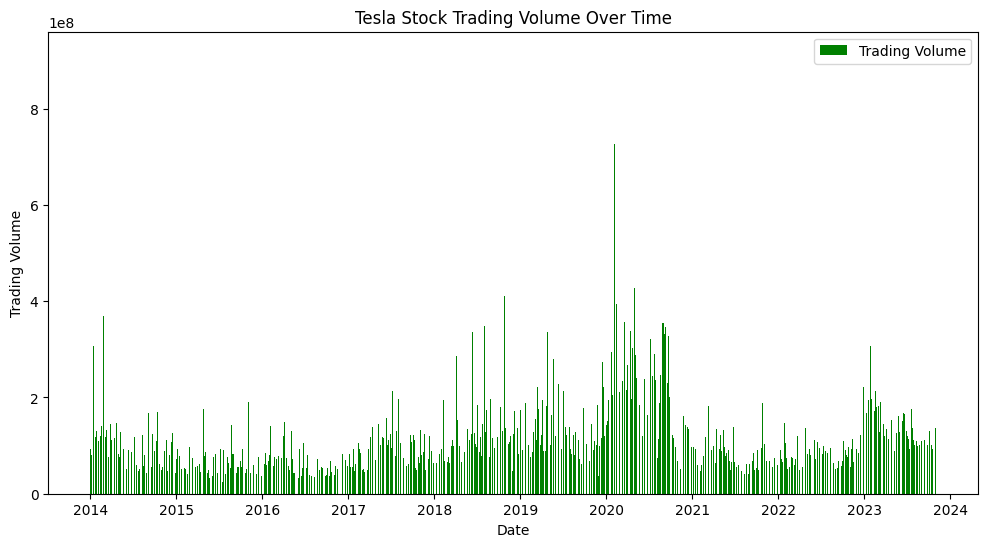

In [6]:
# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.bar(tesla_data['Date'], tesla_data['Volume'], color='green', label='Trading Volume')
plt.title('Tesla Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()


**How does the closing price vary in a specific time period, say a month or a quarter?**

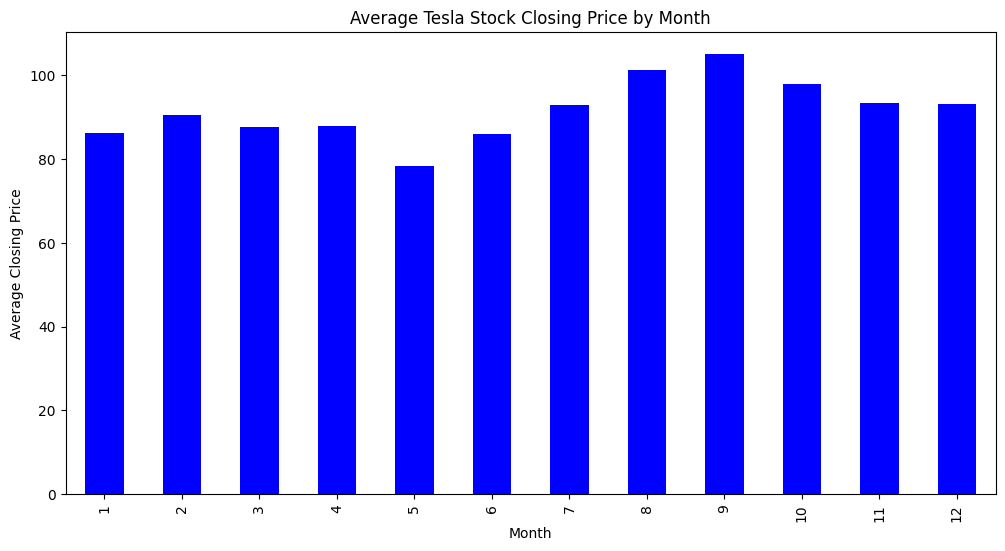

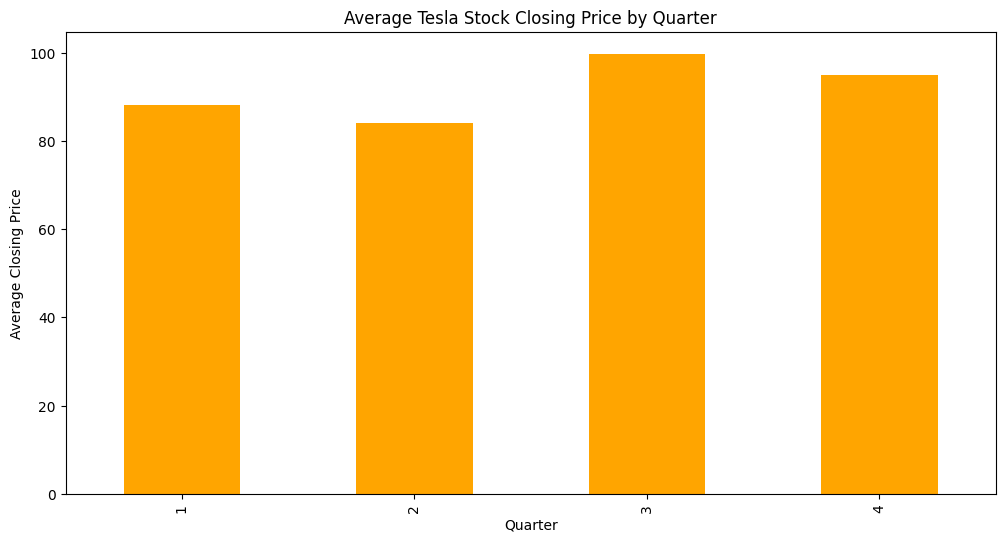

In [7]:
# Extract month and quarter from the 'Date' column
tesla_data['Month'] = tesla_data['Date'].dt.month
tesla_data['Quarter'] = tesla_data['Date'].dt.quarter

# Plot the average closing price for each month
avg_close_month = tesla_data.groupby('Month')['Close'].mean()
plt.figure(figsize=(12, 6))
avg_close_month.plot(kind='bar', color='blue')
plt.title('Average Tesla Stock Closing Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.show()

# Plot the average closing price for each quarter
avg_close_quarter = tesla_data.groupby('Quarter')['Close'].mean()
plt.figure(figsize=(12, 6))
avg_close_quarter.plot(kind='bar', color='orange')
plt.title('Average Tesla Stock Closing Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Closing Price')
plt.show()


**What is the correlation between different numerical columns in the dataset?**

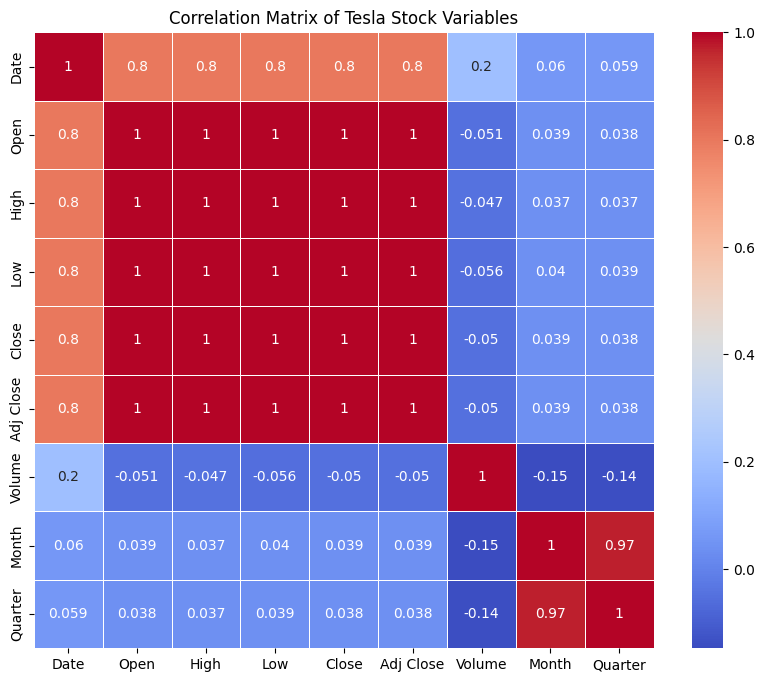

In [8]:
# Calculate the correlation matrix
correlation_matrix = tesla_data.corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Tesla Stock Variables')
plt.show()


**How does the daily price change (percentage) of Tesla stock vary over time?**

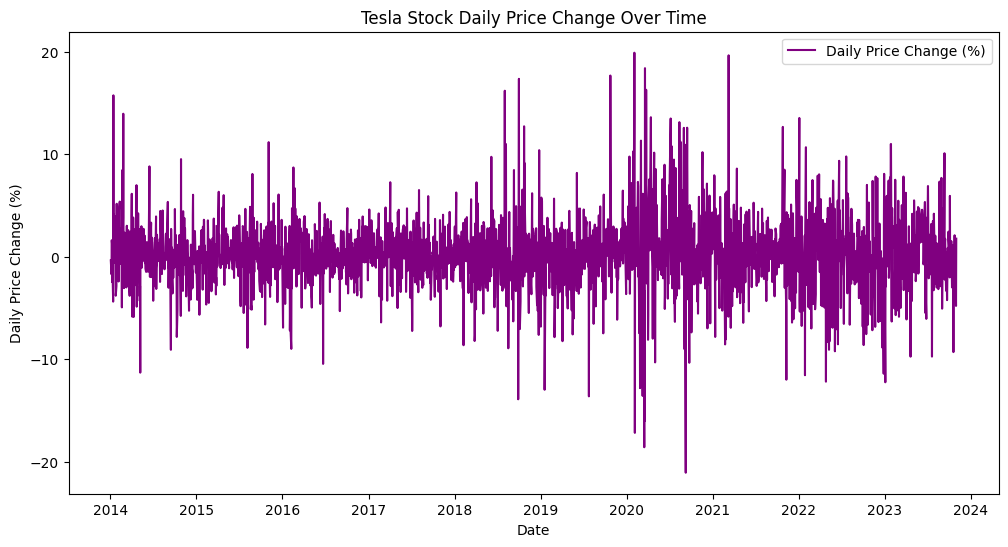

In [9]:
# Calculate daily price change percentage
tesla_data['Daily_Price_Change'] = tesla_data['Close'].pct_change() * 100

# Plot the daily price change percentage over time
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Daily_Price_Change'], label='Daily Price Change (%)', color='purple')
plt.title('Tesla Stock Daily Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Price Change (%)')
plt.legend()
plt.show()


**How is the distribution of the closing prices?**

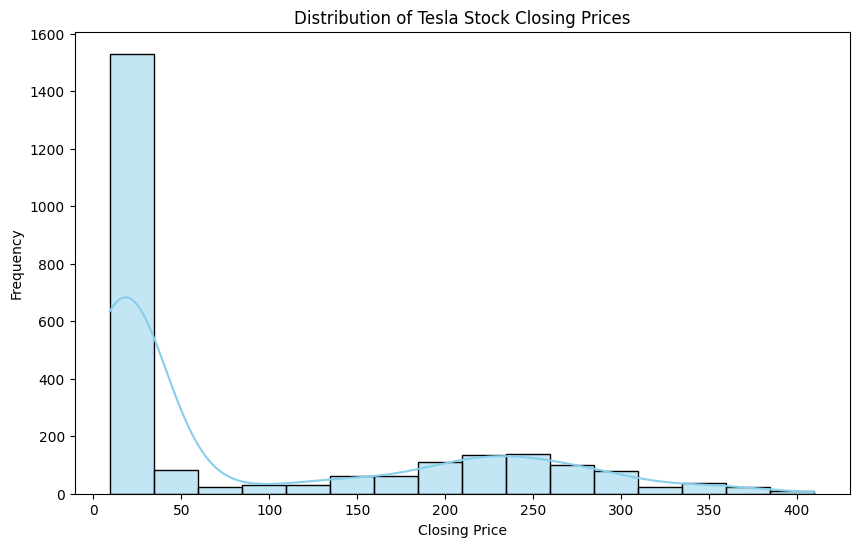

In [10]:
# Plot the distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(tesla_data['Close'], kde=True, color='skyblue')
plt.title('Distribution of Tesla Stock Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


**How does the closing price of Tesla stock compare with its opening price on a daily basis?**

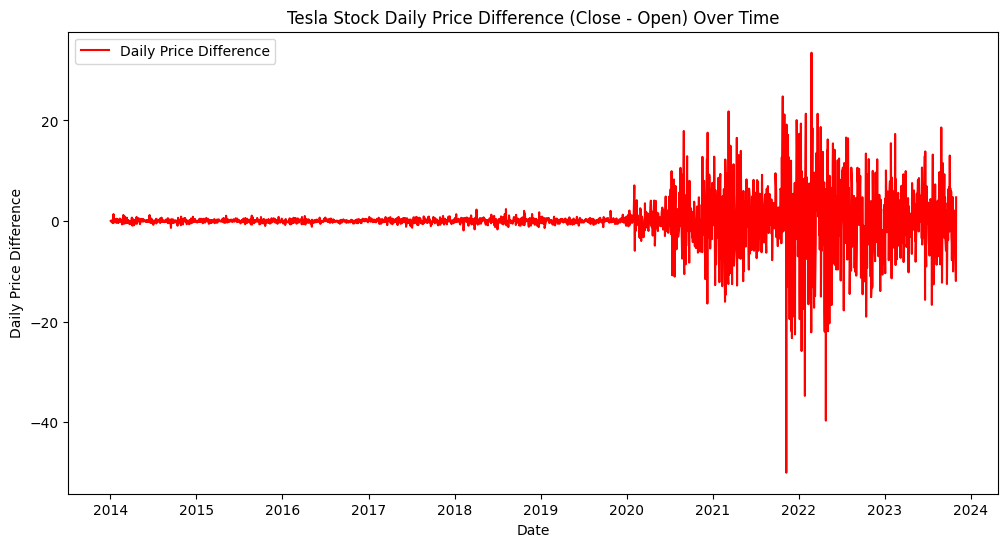

In [11]:
# Calculate daily price difference between opening and closing prices
tesla_data['Daily_Price_Difference'] = tesla_data['Close'] - tesla_data['Open']

# Plot the daily price difference over time
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Daily_Price_Difference'], label='Daily Price Difference', color='red')
plt.title('Tesla Stock Daily Price Difference (Close - Open) Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Price Difference')
plt.legend()
plt.show()


**What is the average trading volume on days where the closing price increased vs. decreased?**

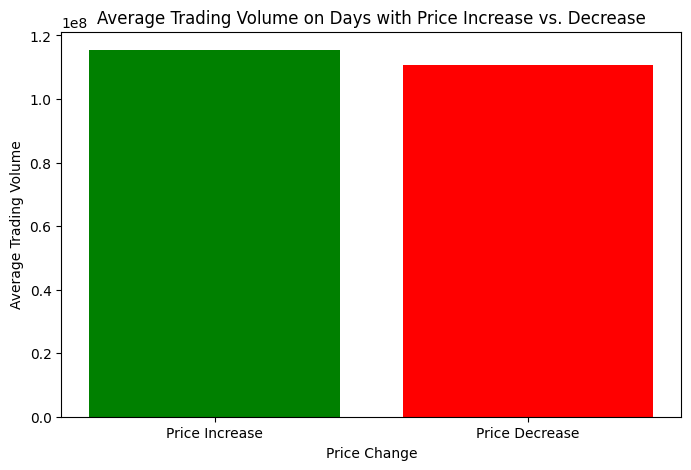

In [12]:
# Create a column indicating whether the closing price increased or decreased
tesla_data['Price_Change'] = tesla_data['Close'].diff().gt(0).astype(int)

# Calculate the average trading volume for days with price increase and decrease
avg_volume_price_increase = tesla_data[tesla_data['Price_Change'] == 1]['Volume'].mean()
avg_volume_price_decrease = tesla_data[tesla_data['Price_Change'] == 0]['Volume'].mean()

# Plot the average trading volume for price increase and decrease
plt.figure(figsize=(8, 5))
plt.bar(['Price Increase', 'Price Decrease'], [avg_volume_price_increase, avg_volume_price_decrease], color=['green', 'red'])
plt.title('Average Trading Volume on Days with Price Increase vs. Decrease')
plt.xlabel('Price Change')
plt.ylabel('Average Trading Volume')
plt.show()


**Is there any seasonality in the Tesla stock closing prices?**

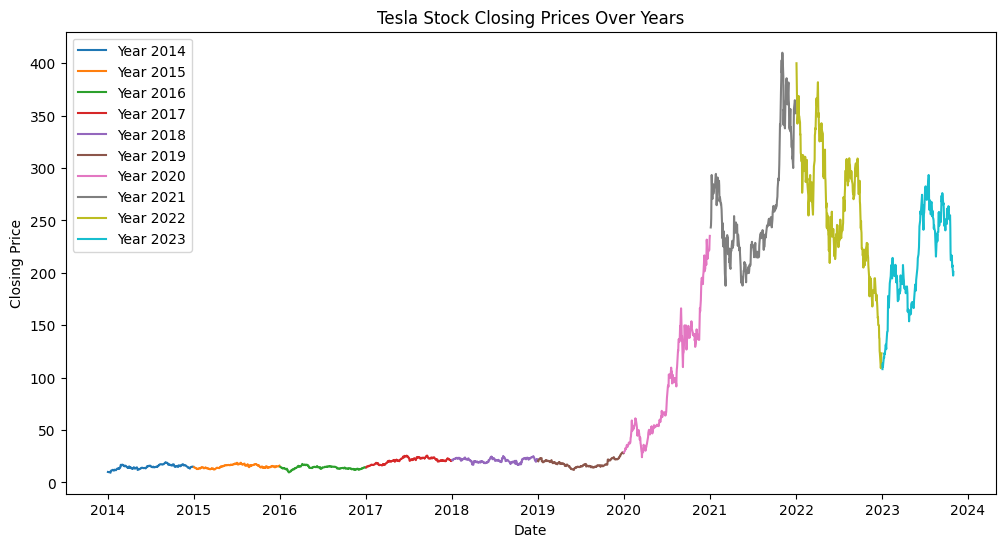

In [13]:
# Extract year from the 'Date' column
tesla_data['Year'] = tesla_data['Date'].dt.year

# Plot the closing prices for each year
plt.figure(figsize=(12, 6))
for year in tesla_data['Year'].unique():
    year_data = tesla_data[tesla_data['Year'] == year]
    plt.plot(year_data['Date'], year_data['Close'], label=f'Year {year}')

plt.title('Tesla Stock Closing Prices Over Years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**How does the volatility of Tesla stock change over time?**

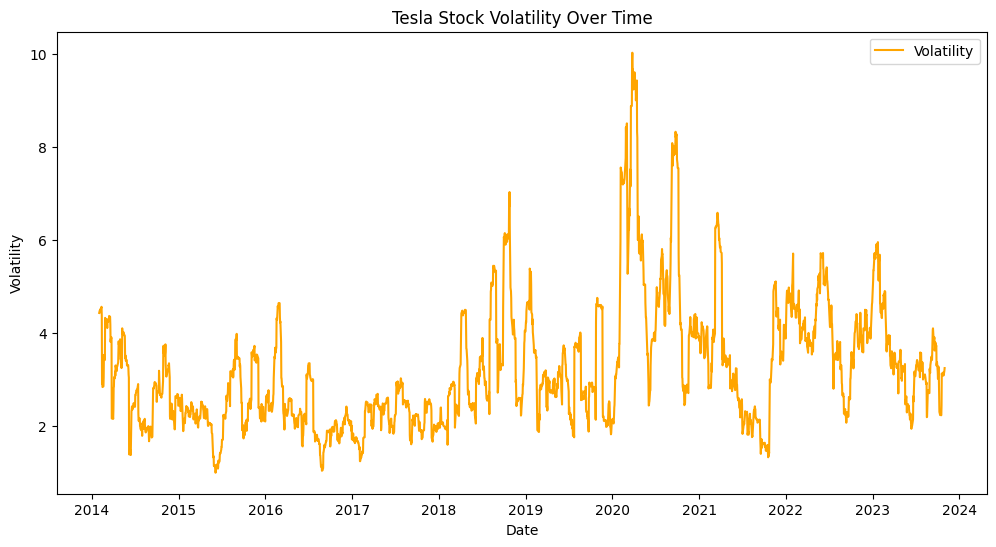

In [14]:
# Calculate daily price volatility (standard deviation of daily price changes)
tesla_data['Volatility'] = tesla_data['Daily_Price_Change'].rolling(window=20).std()

# Plot the volatility over time
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Volatility'], label='Volatility', color='orange')
plt.title('Tesla Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


**How does the closing price of Tesla stock compare between different days of the week?**

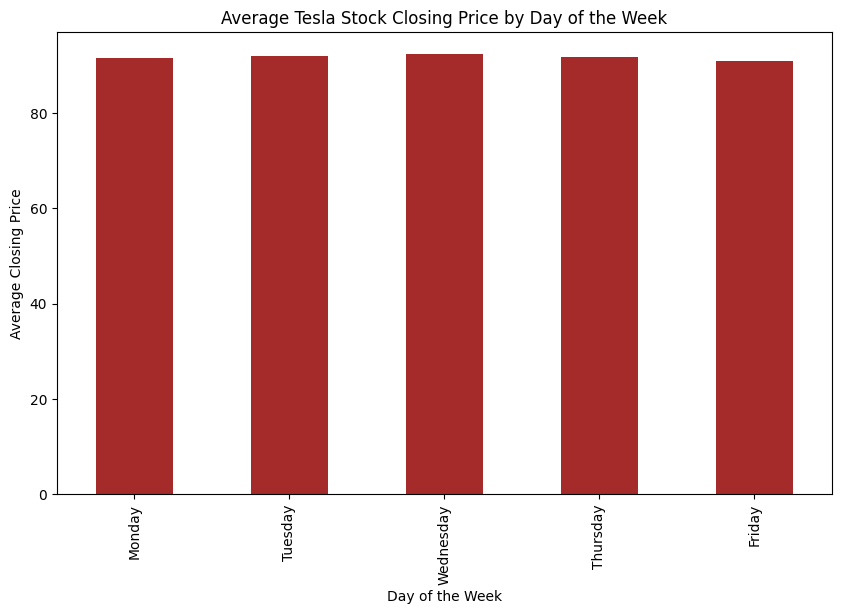

In [15]:
# Extract the day of the week from the 'Date' column
tesla_data['Day_of_Week'] = tesla_data['Date'].dt.day_name()

# Plot the average closing price for each day of the week
avg_close_day_of_week = tesla_data.groupby('Day_of_Week')['Close'].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.figure(figsize=(10, 6))
avg_close_day_of_week[days_order].plot(kind='bar', color='brown')
plt.title('Average Tesla Stock Closing Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Closing Price')
plt.show()


**What is the distribution of daily trading volumes?**

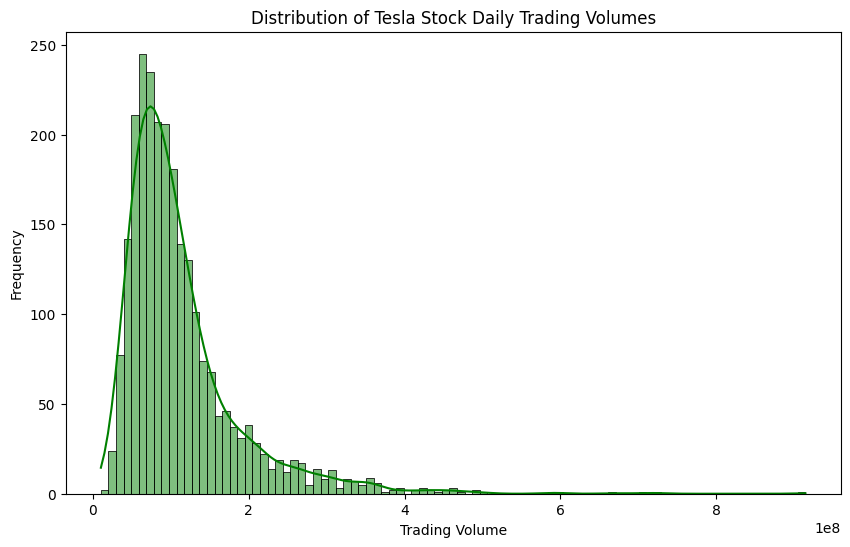

In [16]:
# Plot the distribution of daily trading volumes
plt.figure(figsize=(10, 6))
sns.histplot(tesla_data['Volume'], kde=True, color='green')
plt.title('Distribution of Tesla Stock Daily Trading Volumes')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()


**Are there any outliers in the closing prices, and how are they distributed?**

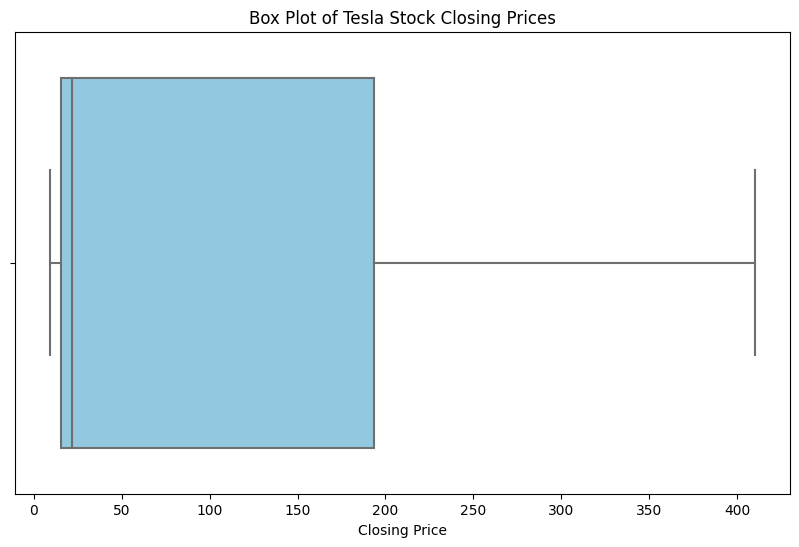

In [17]:
# Identify and visualize outliers in closing prices using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=tesla_data['Close'], color='skyblue')
plt.title('Box Plot of Tesla Stock Closing Prices')
plt.xlabel('Closing Price')
plt.show()


**How has the adjusted closing price of Tesla stock changed over time?**

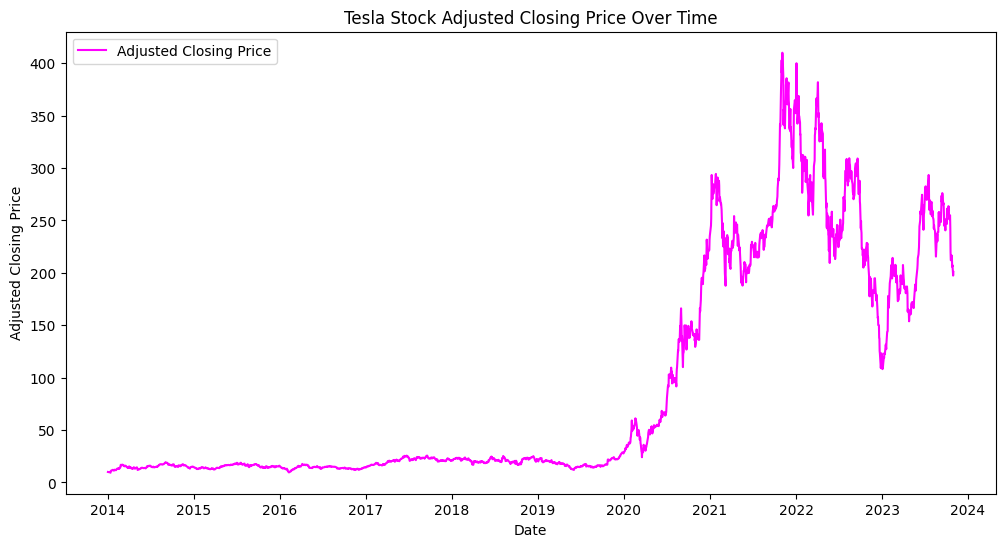

In [18]:
# Plot the adjusted closing price over time
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Adj Close'], label='Adjusted Closing Price', color='magenta')
plt.title('Tesla Stock Adjusted Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()


**Is there any relationship between the opening and closing prices?**

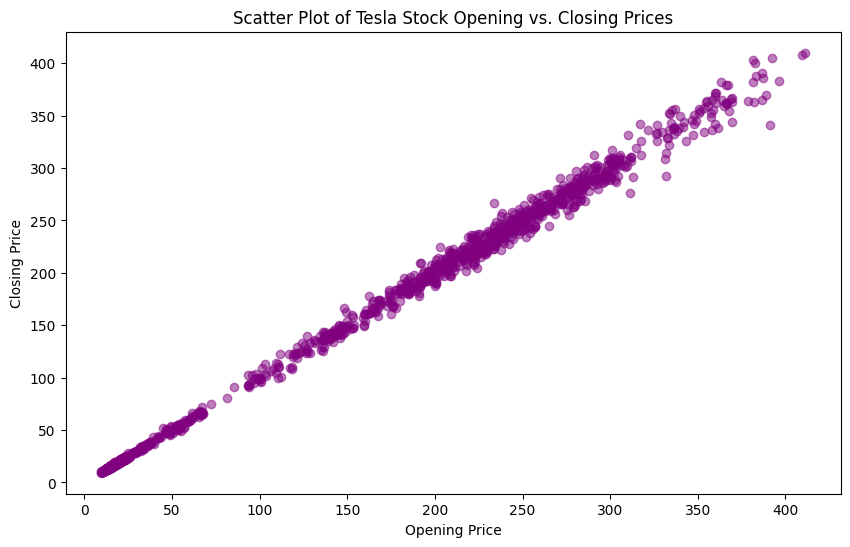

In [19]:
# Scatter plot of opening vs. closing prices
plt.figure(figsize=(10, 6))
plt.scatter(tesla_data['Open'], tesla_data['Close'], color='purple', alpha=0.5)
plt.title('Scatter Plot of Tesla Stock Opening vs. Closing Prices')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.show()


**How has the average closing price changed on a monthly basis over the years?**

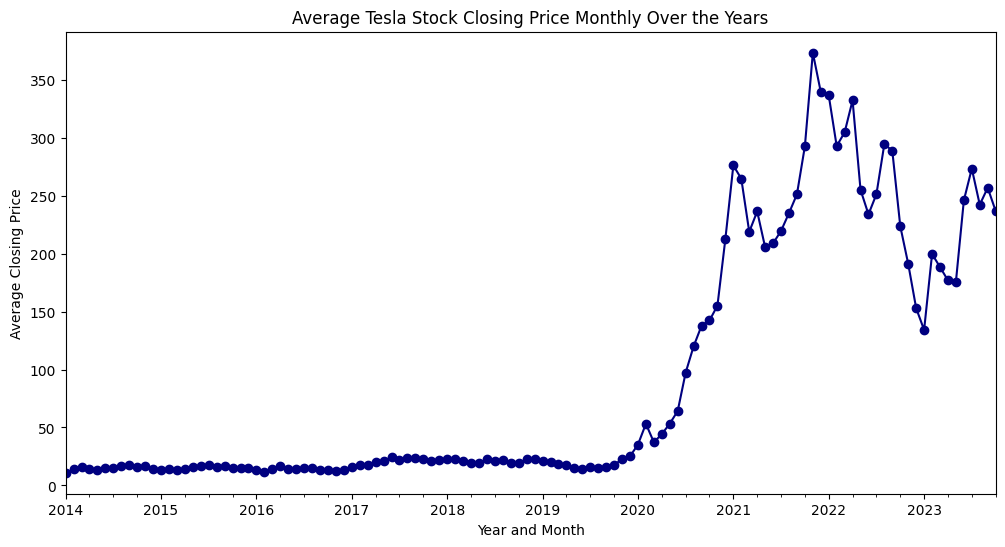

In [20]:
# Extract year and month from the 'Date' column
tesla_data['Year_Month'] = tesla_data['Date'].dt.to_period('M')

# Plot the average closing price for each month over the years
avg_close_monthly = tesla_data.groupby('Year_Month')['Close'].mean()
plt.figure(figsize=(12, 6))
avg_close_monthly.plot(kind='line', marker='o', color='navy')
plt.title('Average Tesla Stock Closing Price Monthly Over the Years')
plt.xlabel('Year and Month')
plt.ylabel('Average Closing Price')
plt.show()


**How has the closing price of Tesla stock evolved during specific market events or milestones?**

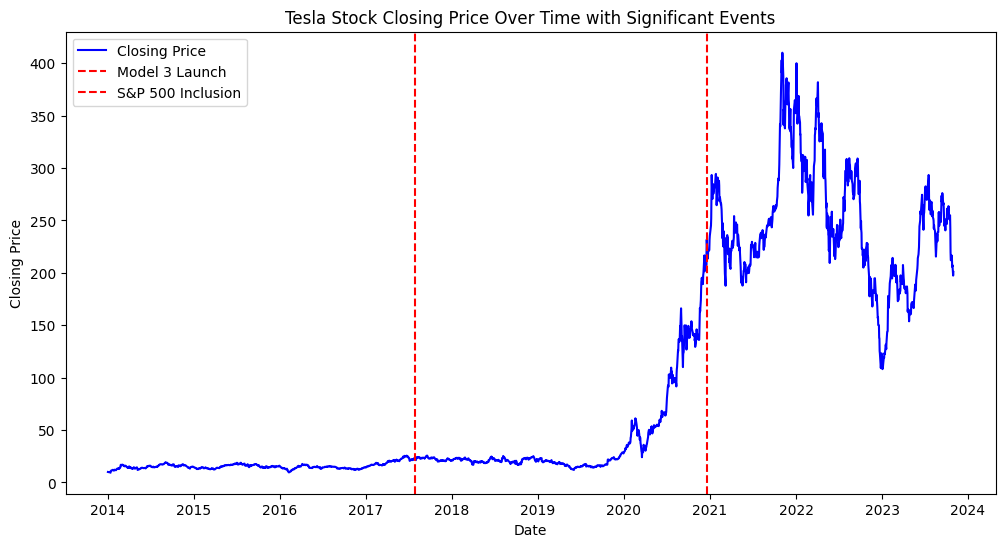

In [21]:
# Define significant market events or milestones with corresponding dates
events = {
    'Model 3 Launch': '2017-07-28',
    'S&P 500 Inclusion': '2020-12-21',
    # Add more events as needed
}

# Plot the closing price along with significant events
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Closing Price', color='blue')

# Mark significant events on the plot
for event, date in events.items():
    plt.axvline(x=pd.to_datetime(date), color='red', linestyle='--', label=event)

plt.title('Tesla Stock Closing Price Over Time with Significant Events')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**What is the rolling mean of the closing price, and how has it changed over time?**

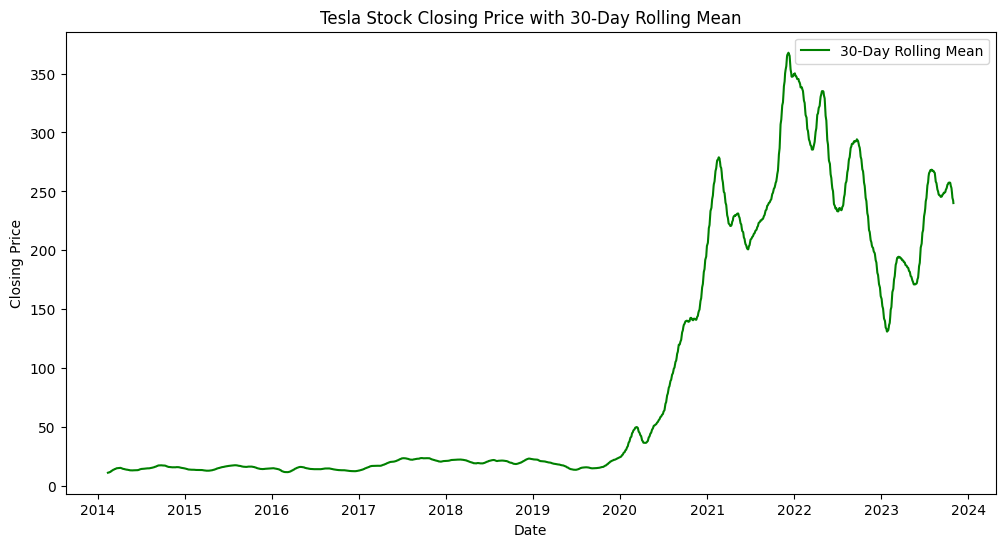

In [22]:
# Calculate the rolling mean of the closing price
rolling_mean = tesla_data['Close'].rolling(window=30).mean()

# Plot the rolling mean over time
plt.figure(figsize=(12, 6))
plt.plot(tesla_data['Date'], rolling_mean, label='30-Day Rolling Mean', color='green')
plt.title('Tesla Stock Closing Price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


**What is the average closing price for each year?**

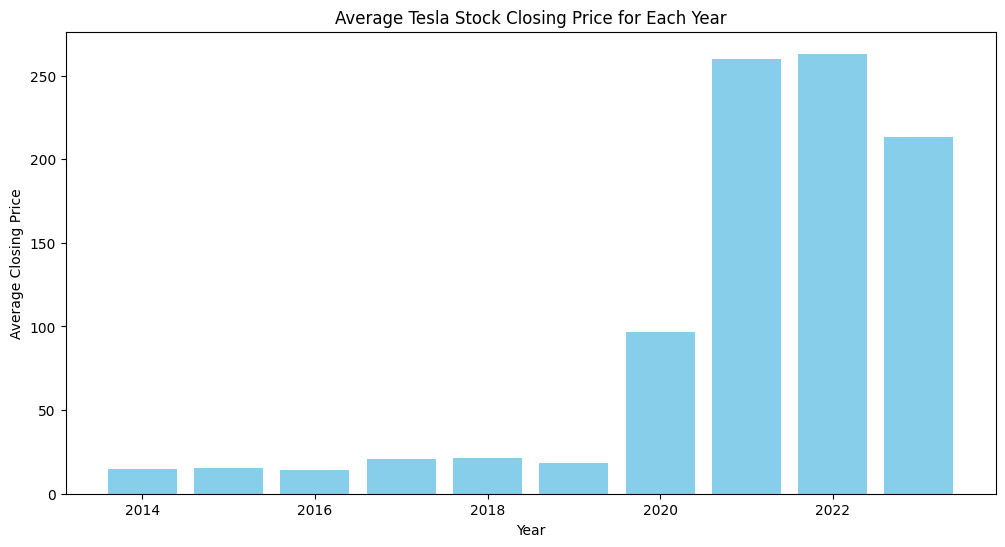

In [23]:
# Extract the year from the 'Date' column
tesla_data['Year'] = tesla_data['Date'].dt.year

# Calculate the average closing price for each year
avg_close_yearly = tesla_data.groupby('Year')['Close'].mean()

# Plot the average closing price for each year using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_close_yearly.index, avg_close_yearly, color='skyblue')
plt.title('Average Tesla Stock Closing Price for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.show()


**How does the average trading volume vary by month?**

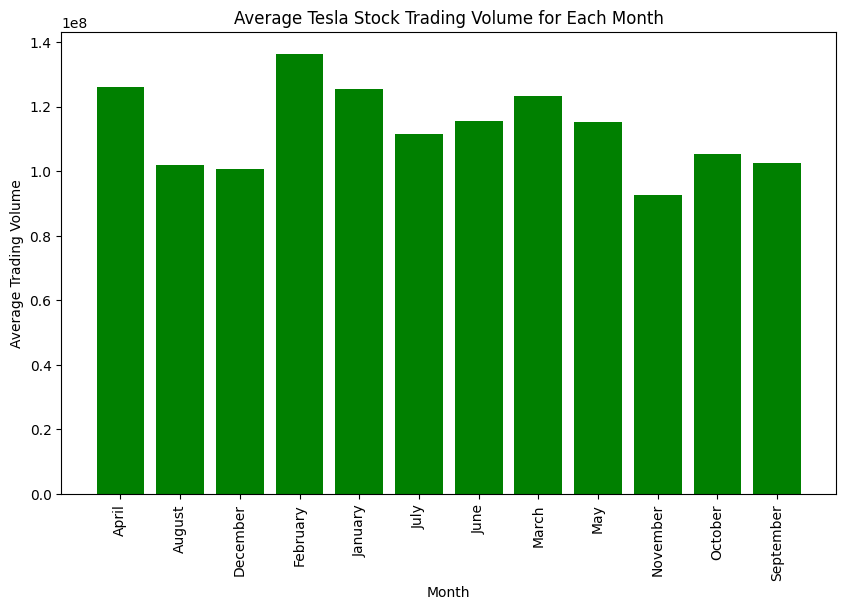

In [24]:
# Extract the month from the 'Date' column
tesla_data['Month'] = tesla_data['Date'].dt.month_name()

# Calculate the average trading volume for each month
avg_volume_monthly = tesla_data.groupby('Month')['Volume'].mean()

# Plot the average trading volume for each month using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_volume_monthly.index, avg_volume_monthly, color='green')
plt.title('Average Tesla Stock Trading Volume for Each Month')
plt.xlabel('Month')
plt.xticks(rotation=90)
plt.ylabel('Average Trading Volume')
plt.show()


**What is the distribution of the closing prices for each quarter?**

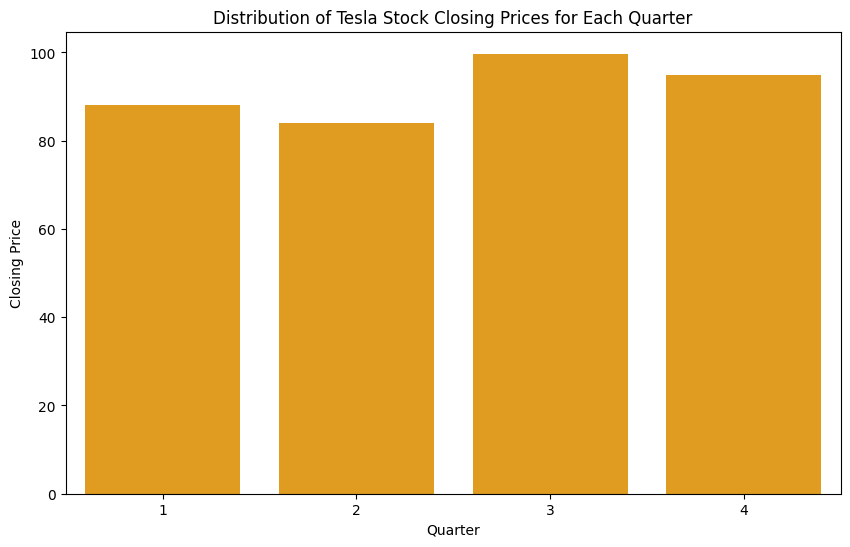

In [25]:
# Extract the quarter from the 'Date' column
tesla_data['Quarter'] = tesla_data['Date'].dt.quarter

# Plot the distribution of closing prices for each quarter using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Close', data=tesla_data, errorbar=None, color='orange')
plt.title('Distribution of Tesla Stock Closing Prices for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Closing Price')
plt.show()


**How does the average closing price vary between weeks?**

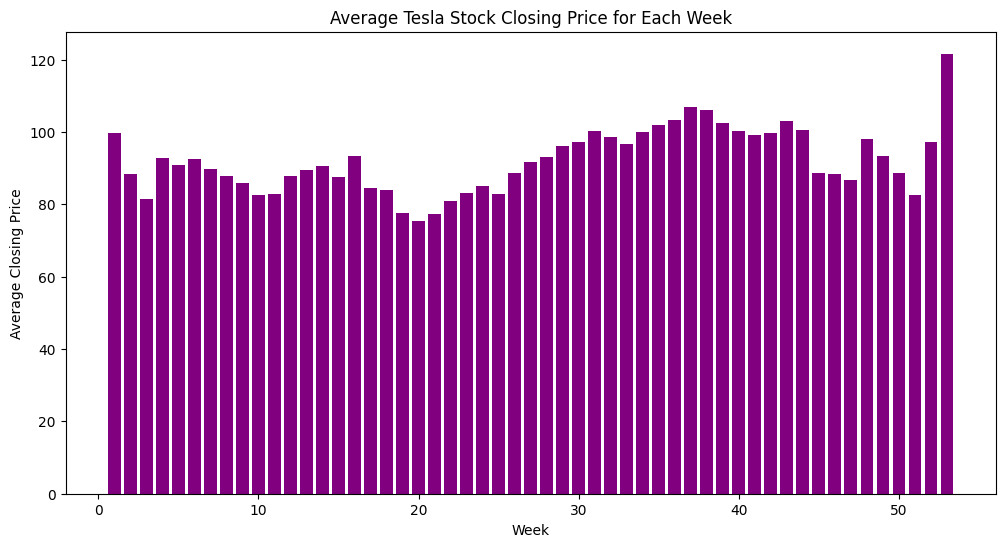

In [26]:
# Extract the week from the 'Date' column
tesla_data['Week'] = tesla_data['Date'].dt.isocalendar().week

# Calculate the average closing price for each week
avg_close_weekly = tesla_data.groupby('Week')['Close'].mean()

# Plot the average closing price for each week using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_close_weekly.index, avg_close_weekly, color='purple')
plt.title('Average Tesla Stock Closing Price for Each Week')
plt.xlabel('Week')
plt.ylabel('Average Closing Price')
plt.show()


**What is the proportion of days with price increase vs. decrease for each month?**

<Figure size 1200x600 with 0 Axes>

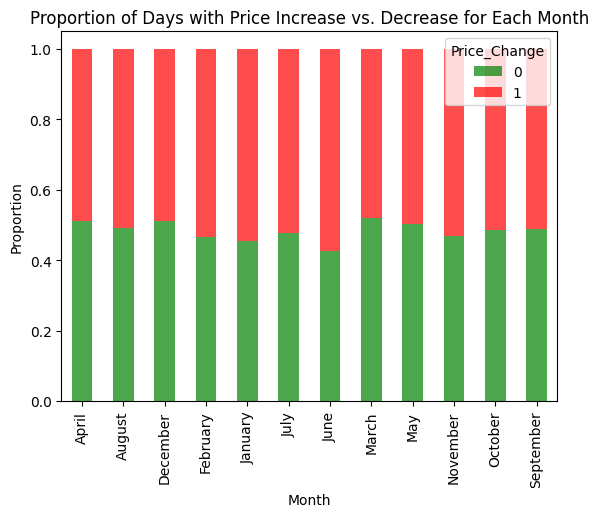

In [27]:
# Calculate the proportion of days with price increase vs. decrease for each month
price_change_proportion_monthly = tesla_data.groupby(['Month', 'Price_Change']).size().unstack(fill_value=0)
price_change_proportion_monthly = price_change_proportion_monthly.div(price_change_proportion_monthly.sum(axis=1), axis=0)

# Plot the proportion of days with price increase vs. decrease for each month using a bar plot
plt.figure(figsize=(12, 6))
price_change_proportion_monthly.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)
plt.title('Proportion of Days with Price Increase vs. Decrease for Each Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.show()


**How does the average closing price vary between different days of the week?**

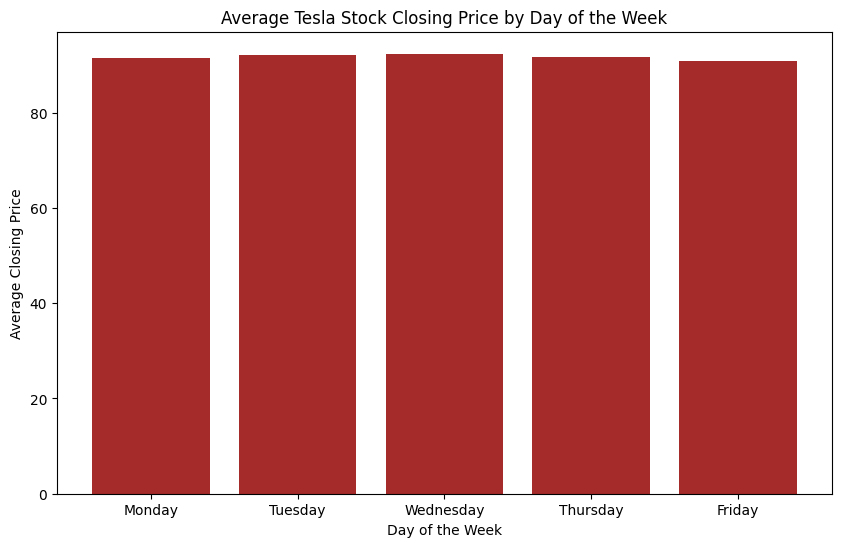

In [28]:
# Calculate the average closing price for each day of the week
avg_close_day_of_week = tesla_data.groupby('Day_of_Week')['Close'].mean()

# Order days of the week for a better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
avg_close_day_of_week = avg_close_day_of_week.reindex(days_order)

# Plot the average closing price for each day of the week using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_close_day_of_week.index, avg_close_day_of_week, color='brown')
plt.title('Average Tesla Stock Closing Price by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Closing Price')
plt.show()


**How has the volatility of Tesla stock changed over the quarters?**

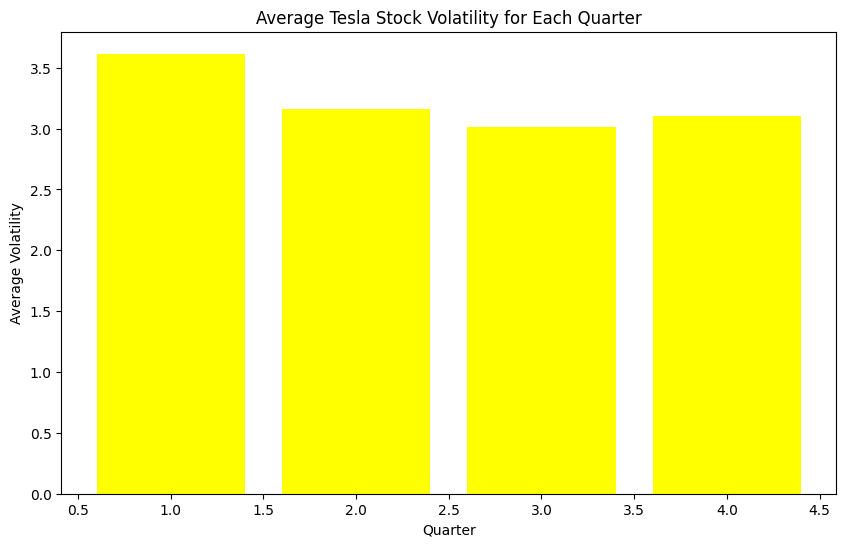

In [29]:
# Calculate the average volatility for each quarter
avg_volatility_quarterly = tesla_data.groupby('Quarter')['Volatility'].mean()

# Plot the average volatility for each quarter using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_volatility_quarterly.index, avg_volatility_quarterly, color='yellow')
plt.title('Average Tesla Stock Volatility for Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Volatility')
plt.show()


**How does the daily price change percentage vary between different years?**

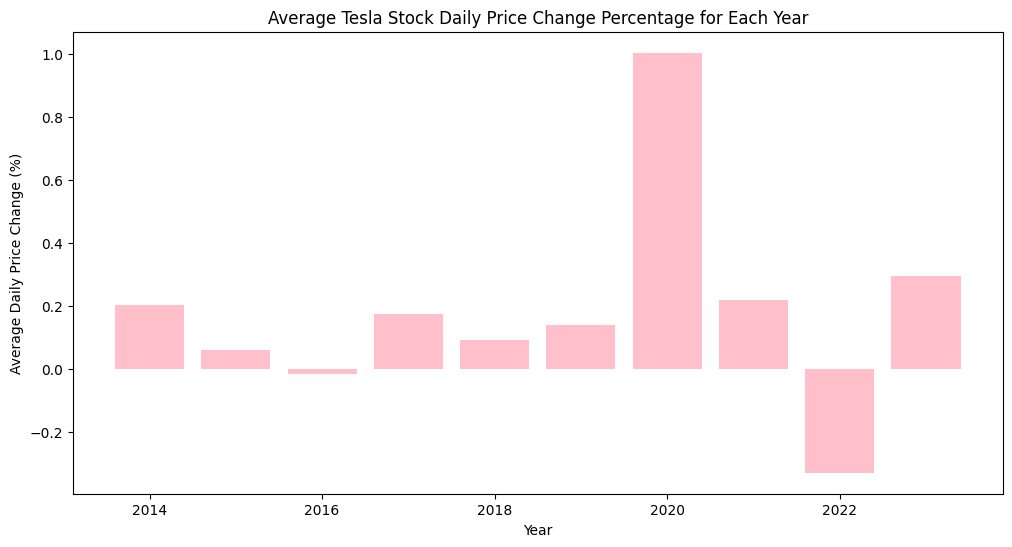

In [30]:
# Extract the year from the 'Date' column
tesla_data['Year'] = tesla_data['Date'].dt.year

# Calculate the average daily price change percentage for each year
avg_daily_price_change_yearly = tesla_data.groupby('Year')['Daily_Price_Change'].mean()

# Plot the average daily price change percentage for each year using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(avg_daily_price_change_yearly.index, avg_daily_price_change_yearly, color='pink')
plt.title('Average Tesla Stock Daily Price Change Percentage for Each Year')
plt.xlabel('Year')
plt.ylabel('Average Daily Price Change (%)')
plt.show()


**What is the distribution of trading volumes for each month?**

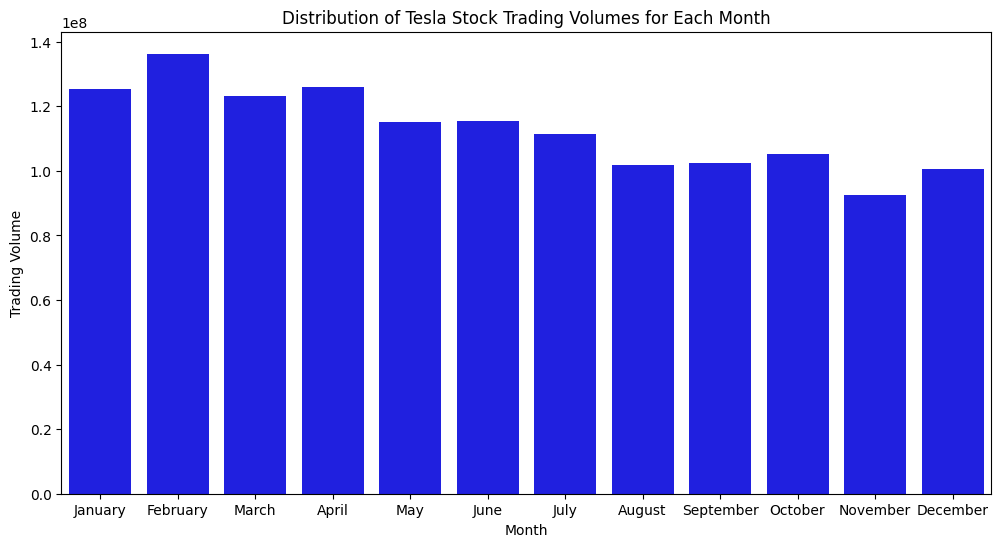

In [31]:
# Plot the distribution of trading volumes for each month using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Volume', data=tesla_data, errorbar=None, color='blue')
plt.title('Distribution of Tesla Stock Trading Volumes for Each Month')
plt.xlabel('Month')
plt.ylabel('Trading Volume')
plt.show()


**Create a Pair Plot to Explore Relationships between Numerical Columns**

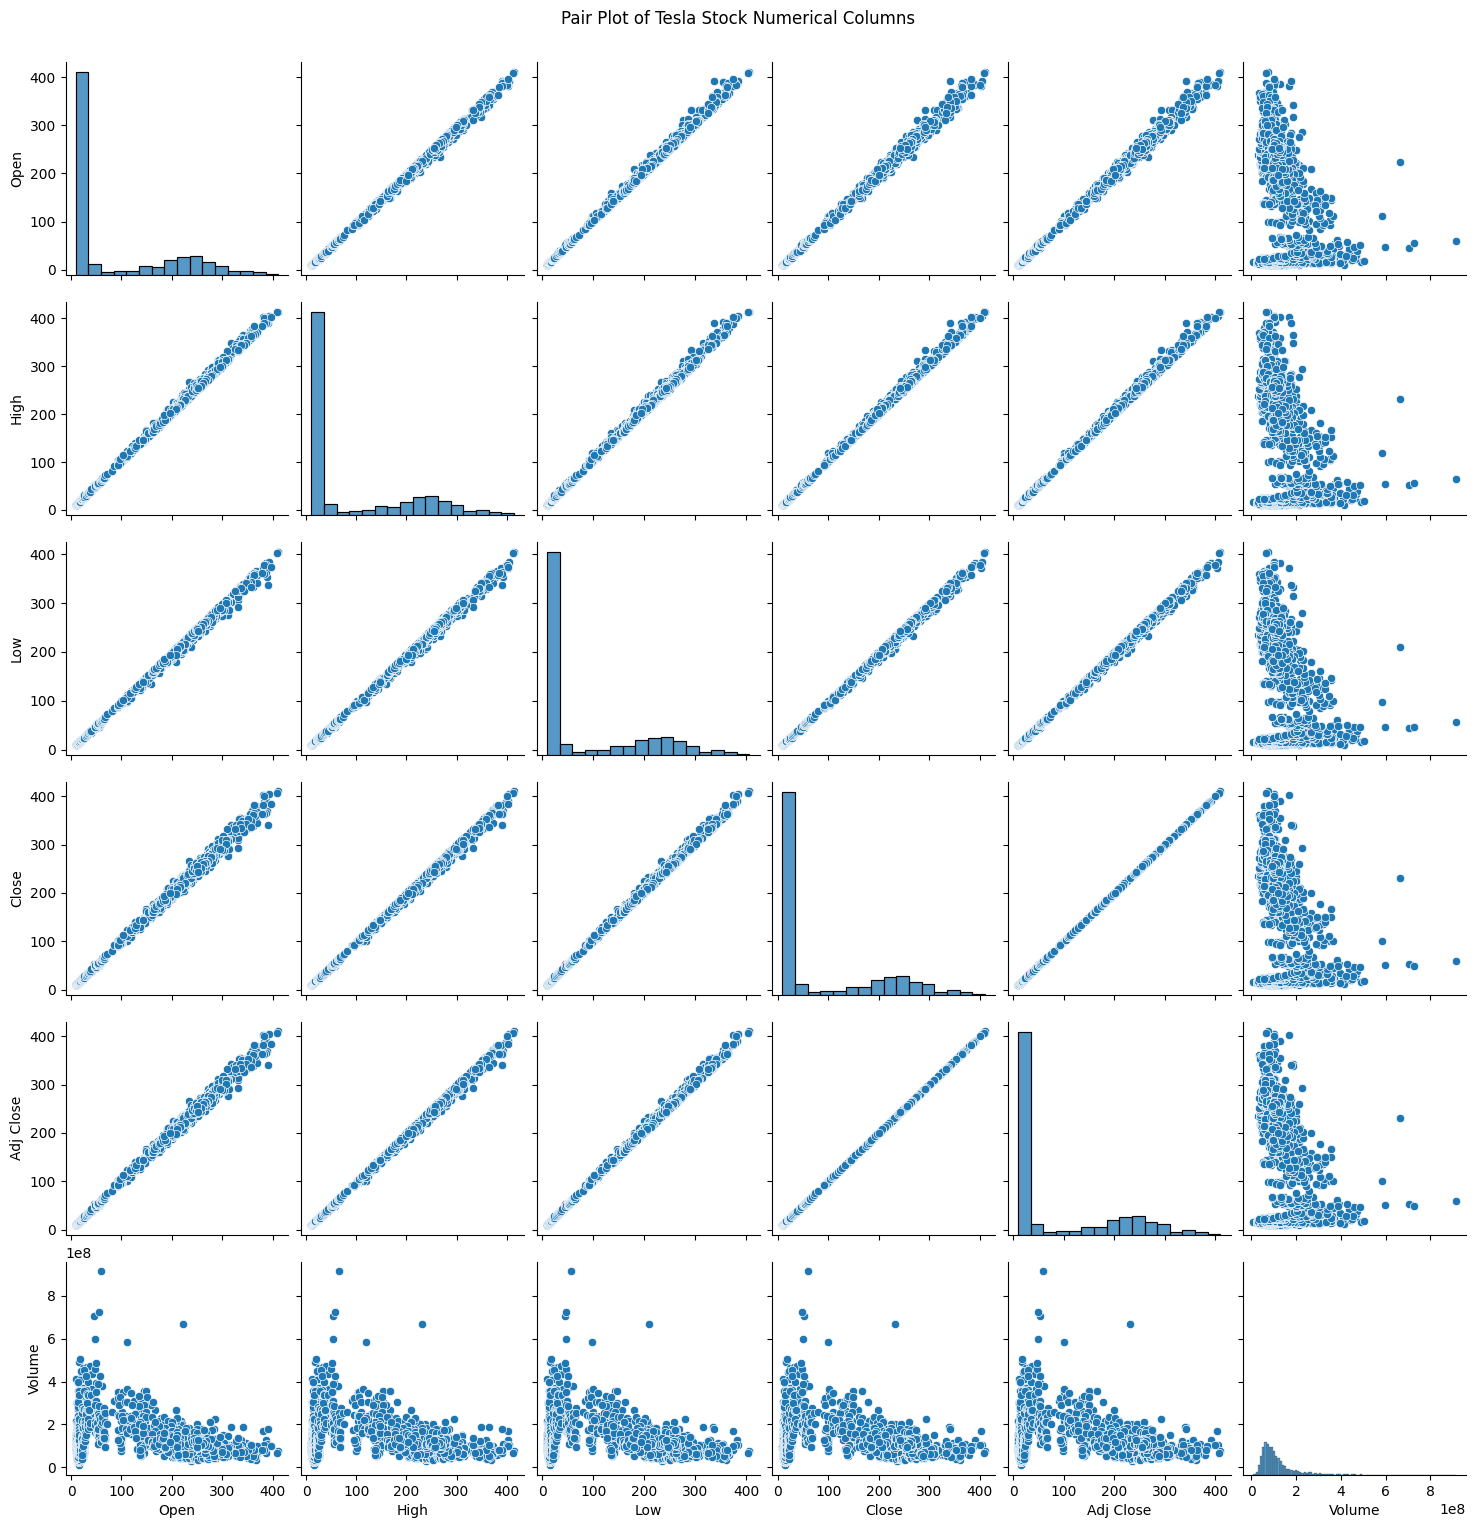

In [32]:
# Select relevant numerical columns for the pair plot
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create a pair plot for the selected numerical columns
import seaborn as sns

sns.pairplot(tesla_data[numerical_columns])
plt.suptitle('Pair Plot of Tesla Stock Numerical Columns', y=1.02)
plt.show()
